In [2]:
import requests
import datetime
import csv
from bs4 import BeautifulSoup

def news_Finder(search_Sentence,start,end,file_Name):
    
    '''
    (str,datetime.date,datetime.date(or datetime.datetime),str) ---> str
    This function shows the number of news of particular date from start to end.
    
    '''
    
    #end에서 하루를 더 더해 반복문에서 원래 now 일자까지의 기사 개수가 나오도록 조정함.
    end += datetime.timedelta(days=1)

    #20XX.XX.XX로 형태를 조정하는 이유: naver에서 리퀘스트 할때 이 형태여야 하기 때문이다.
    end_Date = end.strftime('%Y.%m.%d')

    #기사 개수를 보길 원하는 시작 날짜을 20XX.XX.XX 형태로 나타냄.
    start_Date = start.strftime('%Y.%m.%d')
    
    #엑셀 차트로 표현하기 위해서 csv 모듈 이용해서 파일 작성
    file = open('Data/Naver/'+file_Name+'.csv','a', encoding='euc-kr',newline='')
    csvWriter = csv.writer(file)
    csvWriter.writerow(['검색어','검색 날짜','뉴스 개수'])
    

    while start_Date != end_Date:
        
        #어떤 날짜인지 표시
        print(start_Date)

        #네이버에 리퀘스트를 요청할 날짜를 search_Date로 설정함.
        search_Date = start_Date


        #네이버에서 특정 일자의 특정 단어가 들어간 기사의 개수를 찾기 위한 URL 양식
        address = 'https://search.naver.com/search.naver?where=news' + '&query={}&pd=3&ds={}&de={}'.format(search_Sentence,search_Date,search_Date)
        
        print(address)

        # HTTP GET Request
        
        req = requests.get(address)
                
       
        #html 소스 가져오기
        html = req.text
        
        # BeautifulSoup으로 html소스를 python객체로 변환하기
        # 첫 인자는 html소스코드, 두 번째 인자는 어떤 parser를 이용할지 명시.

        all_news_information = BeautifulSoup(html, 'html.parser')
        
        #Copy selecter에 의해 복사된 태그 사이에 들어가는 정보만 가져옴, 여기서는 뉴스 개수만 가져오기 위함임.
        news_number_info = all_news_information.select('#main_pack > div.news.mynews.section._prs_nws > div.section_head > div.title_desc.all_my > span')


        #뉴스 개수가 존재하지 않아 태그에 해당하는 정보가 존재하지 않을 때 0건으로 저장
        if not news_number_info:
            
            csvWriter.writerow([search_Sentence,search_Date,'0'])


        #데이터들 중에서 온전히 뉴스 개수만 가져오기 위한 과정
        else:
            only_news_number = ((((str(news_number_info[0])).split(' / '))[1]).split('<'))[0]
            only_news_number = only_news_number.replace('건','').replace(',','')

            csvWriter.writerow([search_Sentence,search_Date,only_news_number])


        # 한 과정이 끝날때마다 다음 날짜 뉴스로 넘어가기 위함
        start = start + datetime.timedelta(days=1)
        start_Date = start.strftime('%Y.%m.%d')

In [5]:
start = datetime.date(2019,1,10)
end = datetime.datetime.now()
search_Sentences = ['장자연','버닝썬']
for search_Sentence in search_Sentences:
    file_Name = search_Sentence + '_Naver'
    news_Finder(search_Sentence,start,end,file_Name)

2019.01.10
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.10&de=2019.01.10
2019.01.11
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.11&de=2019.01.11
2019.01.12
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.12&de=2019.01.12
2019.01.13
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.13&de=2019.01.13
2019.01.14
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.14&de=2019.01.14
2019.01.15
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.15&de=2019.01.15
2019.01.16
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.16&de=2019.01.16
2019.01.17
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.17&de=2019.01.17
2019.01.18
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.01.18&de=2019.01.18
2019.01.19
https://search.naver.com/search.naver?where=news&query=장자연&pd=

2019.03.31
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.03.31&de=2019.03.31
2019.04.01
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.04.01&de=2019.04.01
2019.04.02
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.04.02&de=2019.04.02
2019.04.03
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.04.03&de=2019.04.03
2019.04.04
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.04.04&de=2019.04.04
2019.04.05
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.04.05&de=2019.04.05
2019.04.06
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.04.06&de=2019.04.06
2019.04.07
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.04.07&de=2019.04.07
2019.04.08
https://search.naver.com/search.naver?where=news&query=장자연&pd=3&ds=2019.04.08&de=2019.04.08
2019.04.09
https://search.naver.com/search.naver?where=news&query=장자연&pd=

2019.02.01
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.01&de=2019.02.01
2019.02.02
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.02&de=2019.02.02
2019.02.03
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.03&de=2019.02.03
2019.02.04
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.04&de=2019.02.04
2019.02.05
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.05&de=2019.02.05
2019.02.06
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.06&de=2019.02.06
2019.02.07
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.07&de=2019.02.07
2019.02.08
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.08&de=2019.02.08
2019.02.09
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.02.09&de=2019.02.09
2019.02.10
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=

2019.04.22
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.22&de=2019.04.22
2019.04.23
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.23&de=2019.04.23
2019.04.24
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.24&de=2019.04.24
2019.04.25
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.25&de=2019.04.25
2019.04.26
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.26&de=2019.04.26
2019.04.27
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.27&de=2019.04.27
2019.04.28
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.28&de=2019.04.28
2019.04.29
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.29&de=2019.04.29
2019.04.30
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=3&ds=2019.04.30&de=2019.04.30
2019.05.01
https://search.naver.com/search.naver?where=news&query=버닝썬&pd=

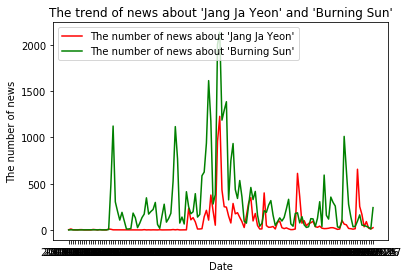

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

search_Sentences = ['장자연','버닝썬']
Date = []
JJY_News = []
BN_News = []
for search_Sentence in search_Sentences:
    
    file_Name = search_Sentence + '_Naver'
    
    file_Directory = 'Data/Naver/'+file_Name 
    
    file = open(file_Directory+'.csv','r', encoding='euc-kr',newline='')
    
    csvReader = csv.reader(file)
    
    
    for line in csvReader:
        
        if line[0] == '검색어':
            Date += []
        
        
        
        else: 
            if search_Sentence == '장자연':
            
                Date.append(line[1])
            
                JJY_News.append(int(line[2]))
        
            
            if search_Sentence == '버닝썬':
           
                BN_News.append(int(line[2]))
            
            

            
plt.plot(Date, JJY_News, 'r-', label="The number of news about 'Jang Ja Yeon'")
plt.plot(Date, BN_News, 'g-', label="The number of news about 'Burning Sun'")

plt.legend(loc=2)

plt.title("The trend of news about 'Jang Ja Yeon' and 'Burning Sun'")
plt.xlabel('Date')
plt.ylabel('The number of news')
plt.show()

for search_Sentence in search_Sentences:
    file_Name = search_Sentence
    file_Directory = 'Data/Naver' + file_Name
    file.close()


            
            
        
        

In [20]:
Date = [1]
Date += []
print(Date)

[1]
